In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
%matplotlib inline

In [2]:
df = pd.read_csv("pokemon.csv")

In [3]:
df.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,#.1
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,1
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,2
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,3
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,4
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,5


In [4]:
type_1 = df.groupby(["Type 1"])["Attack"].mean()
type_2 = df.groupby(["Type 2"])["Attack"].mean()

In [5]:
type_1 = type_1.reset_index()
type_2 = type_2.reset_index()

In [6]:
type_1

,Type 1,Attack
0,Bug,70.555556
1,Dark,90.764706
2,Dragon,110.631579
3,Electric,66.828571
4,Fairy,56.250000
5,Fighting,95.681818
6,Fire,87.400000
7,Ghost,78.941176
8,Grass,72.101695
9,Ground,93.703704


In [7]:
type_2


,Type 2,Attack
0,Bug,90.000000
1,Dark,106.882353
2,Dragon,106.000000
3,Electric,48.000000
4,Fairy,53.833333
5,Fighting,122.411765
6,Fire,97.500000
7,Flying,77.623377
8,Ghost,76.000000
9,Grass,67.692308


In [8]:
merged = pd.merge(type_1, type_2, left_on = ["Type 1"], right_on = ["Type 2"])

In [9]:
merged

,Type 1,Attack_x,Type 2,Attack_y
0,Bug,70.555556,Bug,90.000000
1,Dark,90.764706,Dark,106.882353
2,Dragon,110.631579,Dragon,106.000000
3,Electric,66.828571,Electric,48.000000
4,Fairy,56.250000,Fairy,53.833333
5,Fighting,95.681818,Fighting,122.411765
6,Fire,87.400000,Fire,97.500000
7,Ghost,78.941176,Ghost,76.000000
8,Grass,72.101695,Grass,67.692308
9,Ground,93.703704,Ground,90.575758


In [10]:
merged.drop("Type 1", axis=1, inplace=True)

In [11]:
merged


,Attack_x,Type 2,Attack_y
0,70.555556,Bug,90.000000
1,90.764706,Dark,106.882353
2,110.631579,Dragon,106.000000
3,66.828571,Electric,48.000000
4,56.250000,Fairy,53.833333
5,95.681818,Fighting,122.411765
6,87.400000,Fire,97.500000
7,78.941176,Ghost,76.000000
8,72.101695,Grass,67.692308
9,93.703704,Ground,90.575758


In [12]:
merged.rename({"Type 2":"Type"}, inplace=True, axis=1)

In [13]:
merged

,Attack_x,Type,Attack_y
0,70.555556,Bug,90.000000
1,90.764706,Dark,106.882353
2,110.631579,Dragon,106.000000
3,66.828571,Electric,48.000000
4,56.250000,Fairy,53.833333
5,95.681818,Fighting,122.411765
6,87.400000,Fire,97.500000
7,78.941176,Ghost,76.000000
8,72.101695,Grass,67.692308
9,93.703704,Ground,90.575758


In [14]:
plt.figure(figsize=(14,8))

<Figure size 1008x576 with 0 Axes>

<Figure size 1008x576 with 0 Axes>

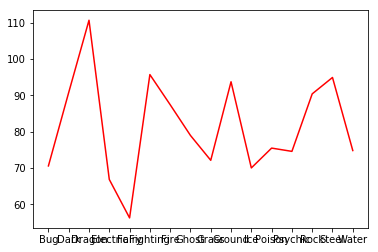

In [15]:
plt.plot(merged['Type'], merged['Attack_x'], color="red")

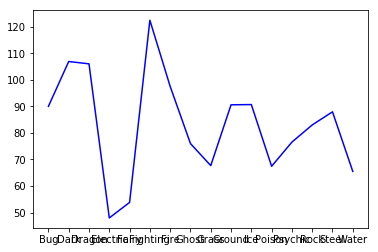

In [16]:
plt.plot(merged["Type"], merged["Attack_y"], color="blue")

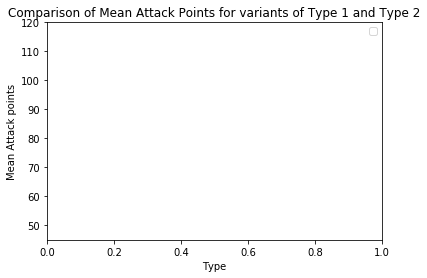

In [17]:
plt.xlabel("Type")
plt.ylabel("Mean Attack points")
plt.title("Comparison of Mean Attack Points for variants of Type 1 and Type 2")
plt.ylim((45, 120))
plt.legend(labels=['Type1', 'Type 2'])

In [18]:
res = df.groupby(["Generation", "Legendary"]).size().unstack()

In [19]:
res

Legendary,False,True
Generation,,
1,160,6
2,101,5
3,142,18
4,108,13
5,60,1


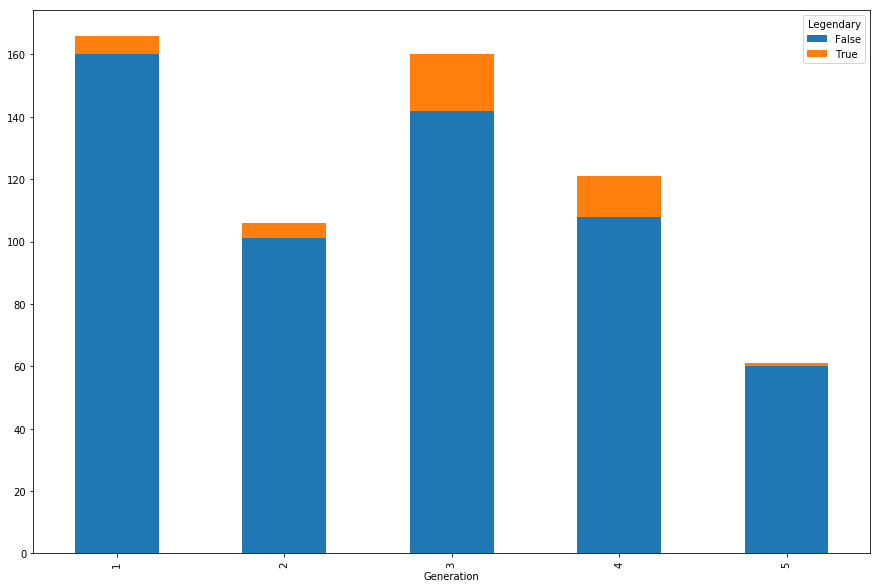

In [20]:
res.plot(kind = "bar", stacked = True, figsize = (15,10))

In [21]:
df.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,#.1
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,1
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,2
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,3
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,4
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,5


In [22]:
df.drop(["#"], axis=1, inplace = True)

In [23]:
df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,#.1
0,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,1
1,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,2
2,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,3
3,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,4
4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,5


In [24]:
df.set_index("Name", inplace=True)

In [25]:
df.head()

,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,#.1
Name,,,,,,,,,,,
Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,1
Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,2
Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,3
Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,4
Charmander,Fire,NaN,39,52,43,60,50,65,1,False,5


In [26]:
df.drop(["#.1"], axis=1, inplace=True)

In [27]:
df.head()

,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,
Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [28]:
mean_attack = df.Attack.mean()

In [29]:
mean_attack

78.48371335504886

In [30]:
dragon = df[df["Type 1"] == "Dragon"]

In [31]:
dragon

,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,
Dratini,Dragon,NaN,41,64,45,50,50,50,1,False
Dragonair,Dragon,NaN,61,84,65,70,70,70,1,False
Dragonite,Dragon,Flying,91,134,95,100,100,80,1,False
Altaria,Dragon,Flying,75,70,90,70,105,80,3,False
Mega Altaria,Dragon,Fairy,75,110,110,110,105,80,3,False
Bagon,Dragon,NaN,45,75,60,40,30,50,3,False
Shelgon,Dragon,NaN,65,95,100,60,50,50,3,False
Salamence,Dragon,Flying,95,135,80,110,80,100,3,False
Mega Salamence,Dragon,Flying,95,145,130,120,90,120,3,False


In [32]:
mean_dragon = dragon.Attack.mean()

In [33]:
mean_dragon

110.63157894736842

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10b0612b0>]],
      dtype=object)

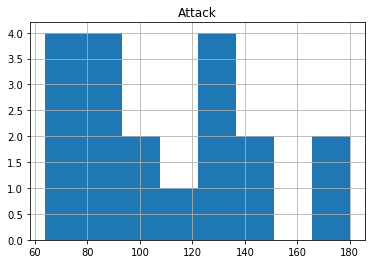

In [34]:
dragon.hist(column="Attack", bins=8)

In [35]:
Electric = df[df["Type 1"] == "Electric"]

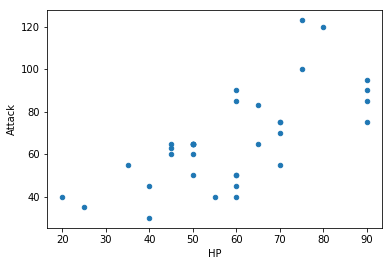

In [36]:
Electric.plot.scatter(x="HP", y="Attack")

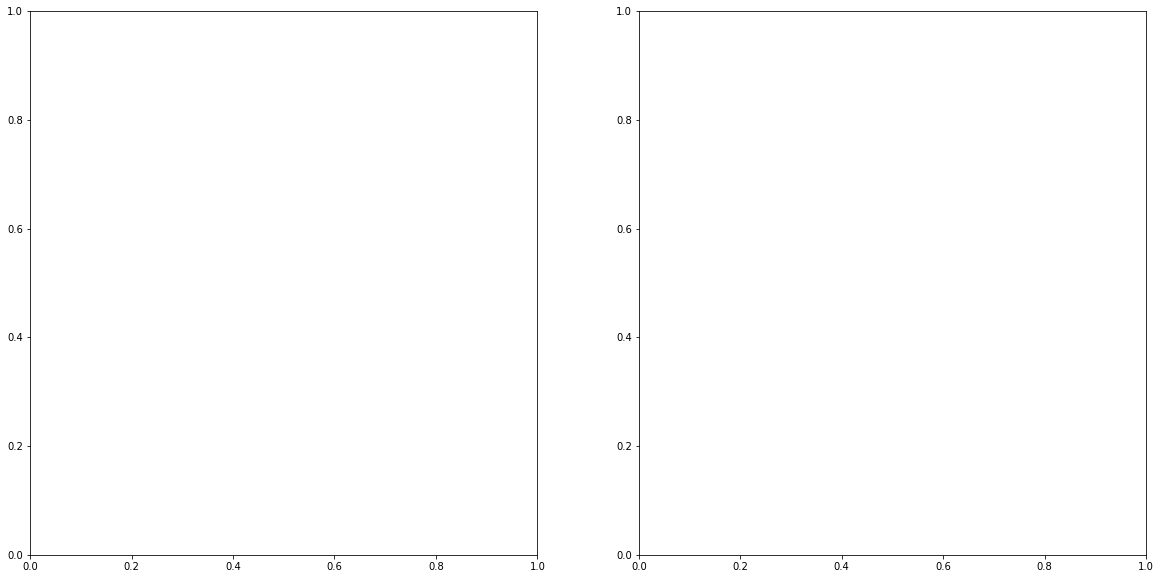

In [37]:
fig, (ax_1, ax_2) = plt.subplots(1,2, figsize=(20,10))

In [38]:
res = df.groupby(["Generation", "Legendary"]).size().unstack()

In [39]:
res.plot(kind='bar', stacked=True, ax=ax_1)

In [40]:
new_res = res.fillna(0)
new_res['Total'] = new_res[True] + new_res[False]
new_res[True] = (new_res[True] / new_res['Total']) * 100
new_res[False] = (new_res[False] / new_res['Total']) * 100
new_res.drop("Total", axis=1, inplace=True)

In [41]:
new_res.plot(kind="bar",stacked = True, ax=ax_2)

# Loan Visualization

In [46]:
data = pd.read_csv("loan.csv")

In [47]:
loan_status = data.Loan_Status.value_counts()

In [48]:
loan_status


Y    415
N    185
Name: Loan_Status, dtype: int64

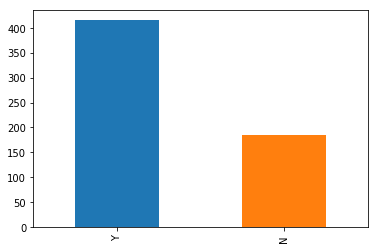

In [49]:
loan_status.plot(kind="bar")

In [51]:
property_and_loan = data.groupby(["Property_Area", "Loan_Status"])

In [70]:
type(property_and_loan)

pandas.core.frame.DataFrame

In [52]:
property_and_loan = property_and_loan.size().unstack()

In [53]:
property_and_loan

Loan_Status,N,Y
Property_Area,,
Rural,68,109
Semiurban,51,175
Urban,66,131


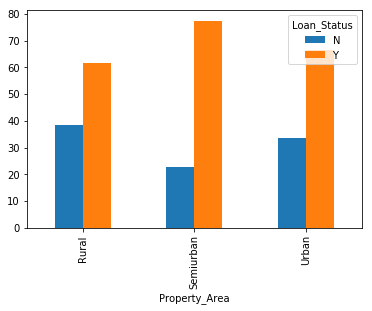

In [82]:

property_and_loan.plot(kind="bar", stacked=False)

In [83]:
education_and_loan = data.groupby(["Education", "Loan_Status"])

In [84]:
education_and_loan = education_and_loan.size().unstack()

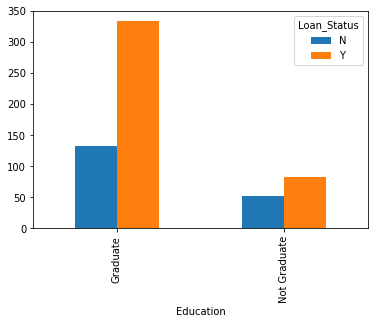

In [86]:
education_and_loan.plot(kind="bar")

In [87]:
graduate = data.where(data.Education == "Graduate")

In [89]:
not_graduate = data.where(data.Education != "Graduate")

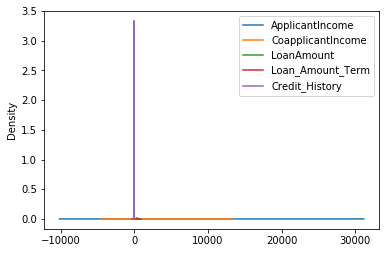

In [104]:
graduate.plot(kind="density", label="Graduate")

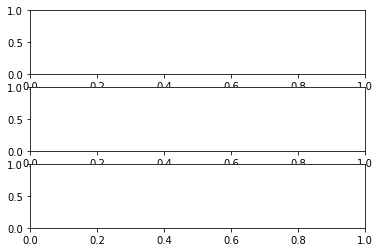

In [125]:
fig, (ax_1, ax_2, ax_3) = plt.subplots(3,1)

In [126]:
ax_1.scatter(data.ApplicantIncome, data.LoanAmount)

In [127]:
ax_1.title = "Applicant Income"

In [128]:
ax_2.scatter(data.CoapplicantIncome, data.LoanAmount)
ax_2.title = "Coapplicant Income"

In [129]:
data["TotalIncome"] = data.ApplicantIncome + data.CoapplicantIncome

In [130]:
ax_3.scatter(data.TotalIncome, data.LoanAmount)
ax_3.title = "Total Income"